# Data Mining - assignment #1

## First Approach: Min-Apriori Algorithm


In [10]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import association_rules
from matplotlib import pyplot as plt

### Read true.csv file and label it with 1


In [11]:
true_df = pd.read_csv(r"True.csv", sep=",")
true_df["label"] = 1
true_df.sample(5)

,title,text,subject,date,label
4898,"Blaming judges is 'corrosive,' says a judge wh...",HONOLULU (Reuters) - One of three federal appe...,politicsNews,"March 16, 2017",1
18492,London's East Croydon station to reopen after ...,LONDON (Reuters) - London s East Croydon stati...,worldnews,"October 2, 2017",1
18,U.S. appeals court rejects challenge to Trump ...,(Reuters) - A U.S. appeals court in Washington...,politicsNews,"December 26, 2017",1
9697,How 'Stop Trump' failed to halt the Republican...,(Reuters) - Republican John Hammond III had ma...,politicsNews,"May 4, 2016",1
5445,"Trump backs Middle East peace, even if not tie...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 15, 2017",1


### Read fake.csv file and label it with 0


In [12]:
fake_df = pd.read_csv(r"Fake.csv", sep=",")
fake_df["label"] = 0
fake_df.sample(5)

,title,text,subject,date,label
9502,TRUMP’S RESPONSE TO TEXAS SHOOTING Sends Anti-...,"President Trump, waved off a question about gu...",politics,"Nov 6, 2017",0
978,"Trump’s Social Media Man Joins Boss’s Insane,...","By now, the entire world is aware that Donald ...",News,"June 29, 2017",0
4710,"This Bank Ripped Us Off In a HUGE Way, Now Ob...","If you listen to conservatives, big money inte...",News,"September 9, 2016",0
1358,WH Sources: Reince Priebus Is Sh**tting His P...,The investigation into possible collusion betw...,News,"May 25, 2017",0
12822,SARAH JESSICA PARKER FEARS She’ll Be Attacked ...,"With absolutely NOTHING to back it up, Sarah J...",politics,"Oct 5, 2016",0


### Combine true and fake news in one dataframe


In [13]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
26963,Hillary Issues POWERFUL Statement On What Whi...,"Earlier today, Hillary Clinton weighed in on t...",News,"July 8, 2016",0
1198,Trump says he believes block-grant healthcare ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 17, 2017",1
37004,WHO NEEDS NANCY PELOSI WHEN CONGRESS HAS PAUL ...,Why do we even need a Congress anymore? We hav...,politics,"Jun 11, 2015",0
14115,Ex-Bosnian Serb commander Mladic convicted of ...,THE HAGUE (Reuters) - A U.N. tribunal on Wedne...,worldnews,"November 21, 2017",1
13933,Thai PM reshuffles cabinet for the fifth time ...,BANGKOK (Reuters) - Thai Prime Minister Prayut...,worldnews,"November 24, 2017",1
5231,Trump says 'revved up economy' will pay for bu...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 28, 2017",1
23154,Patriots White House Group Photo Sure To Infu...,It s no secret that Donald Trump has deep inse...,News,"April 19, 2017",0
17329,"EU maintains summit gesture to May, with condi...",BRUSSELS (Reuters) - European Union leaders wi...,worldnews,"October 16, 2017",1
42028,OOPS! HECKLERS FORCE HILLARY OFF Stage In LA A...,Karma s a bitch or is it the other way around?...,left-news,"May 7, 2016",0
18630,Iraqi PM presses case for Baghdad to receive K...,BAGHDAD (Reuters) - Iraqi Prime Minister Haide...,worldnews,"September 30, 2017",1


### Produce a Frequency-Term Table out of the datafarame


In [14]:
vectorizer = CountVectorizer(stop_words='english', min_df=1000, token_pattern=r'[a-zA-Z]{2,}', max_features=250)
matrix = vectorizer.fit_transform(all_news_df["title"] + " " + all_news_df["text"])

In [15]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df

,according,act,actually,added,administration,agency,al,america,american,americans,...,white,win,women,won,work,working,world,year,years,york
0,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,3,0
1,0,0,0,0,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2
3,1,0,0,0,0,0,1,0,1,0,...,3,0,0,0,0,0,0,1,0,3
4,5,0,0,0,0,2,0,0,1,0,...,1,0,0,0,0,0,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,2,2,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,1
44894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
44895,2,1,0,0,2,0,17,2,0,1,...,0,1,3,1,5,0,4,1,6,2
44896,0,0,0,0,0,0,10,5,0,1,...,0,0,0,0,1,0,0,1,0,0


### min-apriori algorithm implementation

In [16]:
#min-apriori implementation

def normalize_columns(tf_df):
    X = tf_df.to_numpy(dtype=np.float64)
    col_sum = X.sum(axis=0)
    if np.any(col_sum == 0):
        raise ValueError("Zero-frequency term detected")
    return X / col_sum


def support_itemsets(X, candidates):
    supports = []
    for itemset in candidates:
        X_sub = X[:, list(itemset)]
        supports.append(np.min(X_sub, axis=1).sum())
    return np.array(supports)


def generate_candidates(prev_freq, k):
    prev_freq = sorted(prev_freq)
    Ck = []

    for i in range(len(prev_freq)):
        for j in range(i + 1, len(prev_freq)):
            if prev_freq[i][:-1] == prev_freq[j][:-1]:
                c = prev_freq[i] + (prev_freq[j][-1],)
                if all(tuple(sorted(s)) in prev_freq for s in combinations(c, k - 1)):
                    Ck.append(c)
            else:
                break
    return Ck


def min_apriori_words(tf_df, min_support):
    X = normalize_columns(tf_df)
    terms = tf_df.columns.tolist()

    # --- 1-itemsets (must exist)
    C1 = [(i,) for i in range(X.shape[1])]
    S1 = support_itemsets(X, C1)

    print("DEBUG: min/max 1-item support:", S1.min(), S1.max())

    freq = {c: s for c, s in zip(C1, S1) if s >= min_support}

    if not freq:
        raise RuntimeError("No frequent 1-itemsets — support threshold too high or bug")

    Lk = list(freq.keys())
    k = 2

    while Lk:
        Ck = generate_candidates(Lk, k)
        if not Ck:
            break

        Sk = support_itemsets(X, Ck)

        Lk = []
        for c, s in zip(Ck, Sk):
            if s >= min_support:
                freq[c] = s
                Lk.append(c)
        k += 1

    return pd.DataFrame(
        {
            "itemsets": [[terms[i] for i in k] for k in freq],
            "support": list(freq.values()),
        }
    ).sort_values("support", ascending=False)


### Produce Frequent Itemsets


In [17]:
freq_items = min_apriori_words(sparse_df, min_support=0.1)
freq_items.head(20)

DEBUG: min/max 1-item support: 0.9999999999999997 1.0000000000000002


,itemsets,support
29,[children],1.0
91,[home],1.0
241,[win],1.0
80,[got],1.0
161,[police],1.0
36,[come],1.0
0,[according],1.0
30,[china],1.0
26,[case],1.0
10,[anti],1.0


### Produce a Frequency-Term Table out of the datafarame


In [18]:
freq_items.sample(20)

,itemsets,support
4125,"[change, democrats]",0.115836
14069,"[media, need]",0.125114
16431,"[political, thursday]",0.133343
22655,"[policy, states, united]",0.179299
22670,"[political, said, time]",0.103450
8759,"[fact, ve]",0.183759
15129,"[need, think]",0.204122
19883,"[country, year, years]",0.123203
3816,"[candidate, come]",0.139404
7307,"[didn, know]",0.245310


### List the top 20 popular words


In [33]:
word_counts = matrix.sum(axis=0).tolist()[0]
features = vectorizer.get_feature_names_out()
word_freq = dict(zip(features, word_counts))
top_20_freq_items = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
df_top20 = pd.DataFrame(top_20_freq_items, columns=['Word', 'Frequency'])
df_top20

,Word,Frequency
0,trump,149541
1,said,133033
2,president,57657
3,people,42496
4,state,35621
5,new,33113
6,obama,31491
7,clinton,30529
8,house,29756
9,reuters,29567


### Bar plot visualization of the 20 top popular words
#### IMPORTANT NOTE, When use min-apriori all 1-itemsets has the same support which equals to 1 because of the normalization step. So we will use the Frequency of the words not the support to plot the bars chart


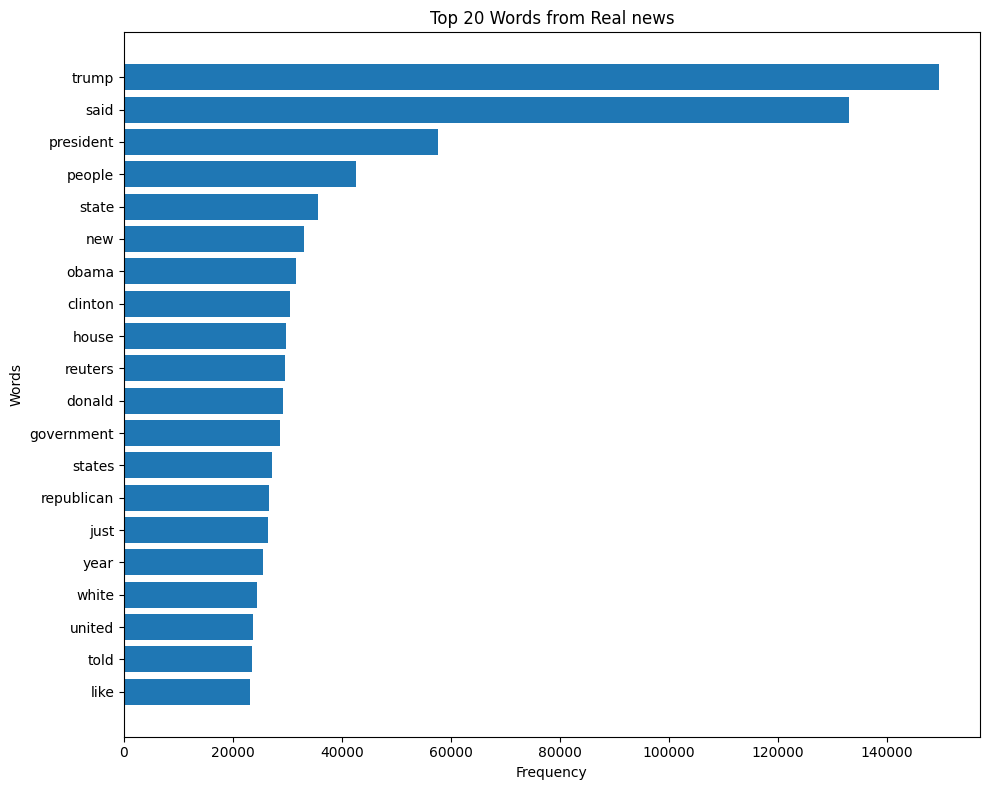

In [34]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
plt.barh(df_top20['Word'], df_top20['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words from Real news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets


In [21]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.9)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head(20)

273 rules generated.


C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: divide by zero encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
115,"(pic, trump)","(twitter, com)",0.125821,0.562675,0.119414,0.949074,1.686718,1.0,0.048617,8.587507e+00,0.465732,0.209835,8.835518e-01,0.580650
162,"(pic, donald)","(twitter, com)",0.125038,0.562675,0.112611,0.900615,1.600596,1.0,0.042255,4.400314e+00,0.428856,0.195810,7.727435e-01,0.550375
113,"(pic, trump, twitter)",(com),0.120376,1.000000,0.119414,0.992005,0.992005,1.0,-0.000962,1.388618e-14,-0.009079,0.119299,-7.201405e+13,0.555709
135,"(featured, twitter, image, pic)",(com),0.116364,1.000000,0.115211,0.990086,0.990086,1.0,-0.001154,1.119799e-14,-0.011205,0.115078,-8.930177e+13,0.552648
59,"(featured, twitter, pic)",(com),0.137632,1.000000,0.136134,0.989113,0.989113,1.0,-0.001498,1.019802e-14,-0.012602,0.135930,-9.805822e+13,0.562624
253,"(pic, twitter, watch)",(com),0.103725,1.000000,0.102149,0.984809,0.984809,1.0,-0.001576,7.308283e-15,-0.016920,0.101988,-1.368311e+14,0.543479
99,"(pic, trump)",(com),0.125821,1.000000,0.123601,0.982357,0.982357,1.0,-0.002220,6.292686e-15,-0.020131,0.123327,-1.589147e+14,0.552979
61,"(pic, twitter, video)",(com),0.137273,1.000000,0.134748,0.981601,0.981601,1.0,-0.002526,6.034161e-15,-0.021264,0.134408,-1.657231e+14,0.558174
83,"(pic, just, twitter)",(com),0.131623,1.000000,0.129052,0.980467,0.980467,1.0,-0.002571,5.683785e-15,-0.022427,0.128721,-1.759391e+14,0.554759
75,"(nuclear, north, china)",(korea),0.134347,1.000000,0.131212,0.976664,0.976664,1.0,-0.003135,0.000000e+00,-0.026860,0.130802,0.000000e+00,0.553938


### Scatterplot of the rules was generated (between support and confidence)


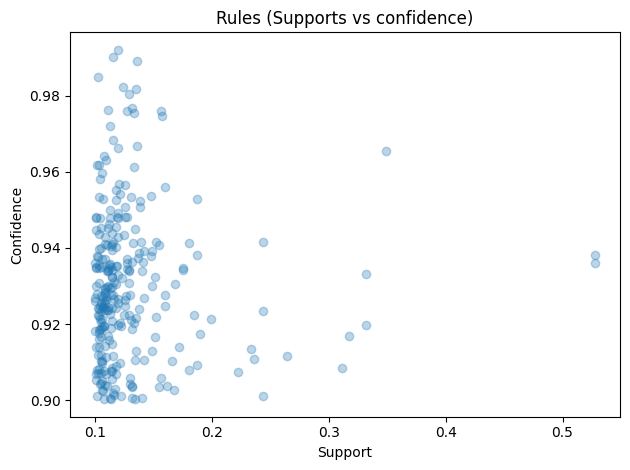

In [22]:
plt.scatter(rules["support"], rules["confidence"], alpha=0.3)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Rules (Supports vs confidence)")
plt.gca()
plt.tight_layout()

In [23]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(pic, twitter)",(com),0.563861,1.0,0.527792,0.936032,0.936032,1.0,-0.036069,1.735598e-15,-0.135465,0.509418,-5.761703e+14,0.731912
1,"(twitter, com)",(pic),0.562675,1.0,0.527792,0.938005,0.938005,1.0,-0.034883,1.790833e-15,-0.131287,0.510002,-5.583993e+14,0.732899
2,"(nuclear, north)",(korea),0.361323,1.0,0.348814,0.965380,0.965380,1.0,-0.012509,0.000000e+00,-0.053164,0.344504,0.000000e+00,0.657097
3,"(featured, trump)",(image),0.355243,1.0,0.331492,0.933141,0.933141,1.0,-0.023751,0.000000e+00,-0.100011,0.323801,0.000000e+00,0.632317
4,"(trump, image)",(featured),0.360429,1.0,0.331492,0.919715,0.919715,1.0,-0.028937,4.148539e-15,-0.120096,0.322169,-2.410487e+14,0.625603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,"(trump, president, reuters, republican)",(donald),0.107429,1.0,0.100435,0.934896,0.934896,1.0,-0.006994,0.000000e+00,-0.072372,0.099738,0.000000e+00,0.517666
269,"(featured, don, right)",(image),0.108287,1.0,0.100374,0.926931,0.926931,1.0,-0.007912,0.000000e+00,-0.081222,0.099586,0.000000e+00,0.513652
270,"(trump, country, united)",(states),0.109177,1.0,0.100248,0.918218,0.918218,1.0,-0.008929,0.000000e+00,-0.090893,0.099361,0.000000e+00,0.509233
271,"(security, states, foreign)",(united),0.106971,1.0,0.100115,0.935908,0.935908,1.0,-0.006856,0.000000e+00,-0.071223,0.099433,0.000000e+00,0.518011


## Analyze the association rules based on top words of fake and true news:
- Find unique sets of top words for both the fake the true news and filter the association rules based on them.
- the following top fake and real words are *derived* from top_20_fake & top_20_true files

Unique Top Real Words Set:

In [24]:
from common_words import get_pure_top_real_words_set
pure_real_set = get_pure_top_real_words_set()
pure_real_set

{'called',
 'country',
 'election',
 'government',
 'house',
 'including',
 'minister',
 'national',
 'republican',
 'reuters',
 'security',
 'state',
 'statement',
 'states',
 'thursday',
 'tuesday',
 'united',
 'wednesday',
 'week',
 'years'}

Unique Top Fake Words Set:

In [25]:
from common_words import get_pure_top_fake_words_set
pure_fake_set = get_pure_top_fake_words_set()
pure_fake_set

{'america',
 'american',
 'don',
 'featured',
 'going',
 'image',
 'just',
 'know',
 'like',
 'make',
 'news',
 'obama',
 'right',
 'say',
 'statehouse',
 'video',
 'watch',
 'way',
 'white'}

### Association Rules More related to fake news

In [26]:
mask_col1 = rules["antecedents"].apply(lambda x: not pure_fake_set.isdisjoint(x))
mask_col2 = rules["consequents"].apply(lambda x: not pure_fake_set.isdisjoint(x))

most_likely_fake_rules = rules[mask_col1 & mask_col2]
most_likely_fake_rules.sample(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
141,"(featured, right, donald)",(image),0.121722,1.0,0.114552,0.941101,0.941101,1.0,-0.007169,0.000000e+00,-0.066519,0.113737,0.000000e+00,0.527827
93,"(featured, trump, like, donald)",(image),0.131558,1.0,0.125852,0.956629,0.956629,1.0,-0.005706,0.000000e+00,-0.049616,0.125138,0.000000e+00,0.541240
98,"(donald, people, image)",(featured),0.135357,1.0,0.124833,0.922250,0.922250,1.0,-0.010524,4.283826e-15,-0.088840,0.123533,-2.334362e+14,0.523542
23,"(just, donald, image)",(featured),0.187707,1.0,0.175462,0.934767,0.934767,1.0,-0.012245,5.105830e-15,-0.079114,0.173340,-1.958546e+14,0.555115
142,"(right, donald, image)",(featured),0.124424,1.0,0.114552,0.920658,0.920658,1.0,-0.009872,4.197855e-15,-0.089607,0.113433,-2.382169e+14,0.517605
245,"(trump, just, like, image)",(featured),0.110424,1.0,0.103292,0.935411,0.935411,1.0,-0.007132,5.156706e-15,-0.072029,0.102560,-1.939223e+14,0.519351
103,"(featured, just, make)",(image),0.131982,1.0,0.121442,0.920139,0.920139,1.0,-0.010540,0.000000e+00,-0.090900,0.120175,0.000000e+00,0.520790
177,"(featured, like, make)",(image),0.118504,1.0,0.110181,0.929765,0.929765,1.0,-0.008323,0.000000e+00,-0.078932,0.109272,0.000000e+00,0.519973
89,"(trump, image, know)",(featured),0.135827,1.0,0.127147,0.936101,0.936101,1.0,-0.008679,5.212410e-15,-0.073207,0.126053,-1.918498e+14,0.531624
148,"(image, donald, time)",(featured),0.125904,1.0,0.114383,0.908489,0.908489,1.0,-0.011522,3.639657e-15,-0.103330,0.113080,-2.747511e+14,0.511436


### Association Rules More related to true news

In [27]:
mask_col1 = rules["antecedents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))
mask_col2 = rules["consequents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))

most_likely_true_rules = rules[mask_col1 | mask_col2]
most_likely_true_rules = most_likely_true_rules.sort_values(by='jaccard', ascending=False)
most_likely_true_rules.sample(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
209,"(washington, republican, white)",(house),0.116514,1.0,0.106059,0.910270,0.910270,1.0,-0.010455,0.0,-0.100376,0.104962,0.0,0.508164
29,"(trump, president, said, reuters)",(donald),0.172125,1.0,0.159687,0.927740,0.927740,1.0,-0.012438,0.0,-0.085992,0.157726,0.0,0.543714
60,"(washington, said, white)",(house),0.147715,1.0,0.134839,0.912830,0.912830,1.0,-0.012876,0.0,-0.100756,0.133124,0.0,0.523834
101,"(washington, donald, white)",(house),0.133169,1.0,0.122443,0.919457,0.919457,1.0,-0.010726,0.0,-0.091781,0.121144,0.0,0.520950
107,"(trump, president, said, white)",(house),0.130551,1.0,0.120079,0.919786,0.919786,1.0,-0.010472,0.0,-0.091161,0.118834,0.0,0.519932
20,"(military, states)",(united),0.198851,1.0,0.180552,0.907979,0.907979,1.0,-0.018298,0.0,-0.112296,0.177308,0.0,0.544266
57,"(nuclear, states)",(united),0.145807,1.0,0.136656,0.937239,0.937239,1.0,-0.009151,0.0,-0.072696,0.135417,0.0,0.536947
131,"(said, trump, president, reuters, washington)",(donald),0.124461,1.0,0.115456,0.927645,0.927645,1.0,-0.009005,0.0,-0.081799,0.114425,0.0,0.521550
39,"(said, washington, united)",(states),0.165064,1.0,0.151302,0.916628,0.916628,1.0,-0.013762,0.0,-0.098235,0.149248,0.0,0.533965
266,"(trump, people, united)",(states),0.110078,1.0,0.100610,0.913988,0.913988,1.0,-0.009468,0.0,-0.095633,0.099666,0.0,0.507299


## Results:
### Selected Top 5 Association Rules

In [28]:
# most likely related to fake news
# (trump, image) ---> (featured)
most_likely_fake_rules.loc[4]

antecedents                  (trump, image)
consequents                      (featured)
antecedent support                 0.360429
consequent support                      1.0
support                            0.331492
confidence                         0.919715
lift                               0.919715
representativity                        1.0
leverage                          -0.028937
conviction                              0.0
zhangs_metric                     -0.120096
jaccard                            0.322169
certainty            -241048736503336.34375
kulczynski                         0.625603
Name: 4, dtype: object

In [29]:
# most likely related to fake news
# (just, video, featured) ---> (image)
most_likely_fake_rules.loc[100]

antecedents           (featured, just, video)
consequents                           (image)
antecedent support                   0.131759
consequent support                        1.0
support                              0.122825
confidence                           0.932191
lift                                 0.932191
representativity                          1.0
leverage                            -0.008934
conviction                                0.0
zhangs_metric                       -0.077304
jaccard                              0.121737
certainty                                 0.0
kulczynski                           0.527508
Name: 100, dtype: object

In [30]:
# most likely related to true news
# (president, reuters, white) ---> (house)
most_likely_true_rules.loc[90]

antecedents           (president, reuters, white)
consequents                               (house)
antecedent support                       0.135477
consequent support                            1.0
support                                  0.126958
confidence                               0.937117
lift                                     0.937117
representativity                              1.0
leverage                                -0.008519
conviction                                    0.0
zhangs_metric                           -0.072028
jaccard                                  0.125885
certainty                                     0.0
kulczynski                               0.532037
Name: 90, dtype: object

In [31]:
# most likely related to true news
# (washington, reuters, white) --->	(house)
most_likely_true_rules.loc[65]

antecedents           (washington, reuters, white)
consequents                                (house)
antecedent support                        0.141839
consequent support                             1.0
support                                    0.13403
confidence                                0.944944
lift                                      0.944944
representativity                               1.0
leverage                                 -0.007809
conviction                                     0.0
zhangs_metric                            -0.063577
jaccard                                   0.132991
certainty                                      0.0
kulczynski                                0.539487
Name: 65, dtype: object

In [32]:
# most likely related to true news
# (reuters, president, said, united) ---> (states)
most_likely_true_rules.loc[102]

antecedents           (reuters, president, said, united)
consequents                                     (states)
antecedent support                              0.135362
consequent support                                   1.0
support                                         0.121988
confidence                                      0.901198
lift                                            0.901198
representativity                                     1.0
leverage                                       -0.013374
conviction                                           0.0
zhangs_metric                                   -0.11253
jaccard                                         0.120378
certainty                                            0.0
kulczynski                                      0.511593
Name: 102, dtype: object

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said". Also The words are part of multiple news subjects like "featured" in (news) subject, and "president" in (politics/middle-east) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * If a news record satisfies one of the following rules, there is a good chance it is true: (We picked the previous rules because they contains formal news words and a name of well known news agency. )

        - (white, reuters, president) ---> (house)
        - (washington, white, reuters) --->	(house)
        - (president, united, reuters, said) ---> (states)
    * If a news record satisfies one of the following rules, there is a good chance it is fake:
        - (trump, image) ---> (featured)
        - (just, video, featured) ---> (image)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------